Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 03: Analysis of behavioural data

## Introduction

This week's sheet should be solved and handed in at 14:00 at **Tuesday, May 7, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your tutors. Please push your results to your Github group folder.

In this exercise sheet we will start to work on a real dataset from an ongoing experiment. In this experiment the participants were asked to freely explore an unknown virtual city, called Seahaven, with an interactive map. After a sufficiently long exploration the participants were tested on three different tasks: 

- the **absolute orientation** of a single house towards the north cardinal direction
- the **relative orientation** between two houses 
- **pointing** from the location of one house to the other

Each task type was performed in two time conditions:

- **3 seconds** for spontaneous decisions
- **infinite** response time for cognitive reasoning

These measurements were repeated up to three times on different days.

We will provide you with more detailed information about this experiment in the tutorial. If you are interested in more than this feel free to have a look at the paper https://www.biorxiv.org/content/10.1101/539080v1.

A small side remark to the dataset: The RTs for the absolute task are exactly the same for both time conditions. This is an error that cannot be corrected on a short notice. Please keep that in mind, when you evaluate your plots.

## Assignment 0: Peer review for sheet 02 [3 pts]

Open an issue in the repository of the groups you have to check. The title of the issue should be your group name (e.g. "Group1). Comment on what was good and what was bad, the aesthetics and ease of reading the plots, what you would have done differently and how many points you would give them for their solutions.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 11, 9 | 5, 1  | 8, 2  | 2, 7 | 10, 6 | 7, 11 | 6, 5  | 4, 3  | 3, 8  | 1, 4   | 9, 10  |

## Assignment 1: Preprocessing [3 pts]

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
import xlrd

In [2]:
# use pd.set_option here to display in a nice way
# only display 30 rows
pd.set_option("display.max_rows", 30)
# displays precision for decimal numbers
pd.set_option("display.precision", 3)

### a) Preprocessing the data [1 pt]

First of all you should preprocess the data. This is an important step to avoid running into any problems when you start to analyse the data. Since we provide the Seahaven dataset as an excel file make sure to run ```pip install xlrd``` in your activated acc environment beforehand. This allows you to directly read from excel files.

- Import the data of all three tasks (Absolute, Relative, Pointing) into one dataframe. Since we don't need the whole data, load only the columns "ReactionTime", "AngularDiffBin", "Subject", "Task", "Time", "Answer" and "Measurement".
- Clean the dataframe of all NaNs, i.e. remove all rows where at least one element is missing. How many rows have been removed?
- Change the values of the column "Answer". Replace each value "wrong" with 0 and each value "correct" with 1.

In [3]:
# set path of dataset
path = 'Seahaven_dataset.xlsx'

# use columns "ReactionTime", "AngularDiffBin", "Subject", "Task, "Time", "Answer" and "Measurement"
seaHaven = pd.read_excel(path, sheet_name=['AbsoluteTask', 'RelativeTask', 'PointingTask'])

# concatenate the 3 respective dataframes into one
seaHaven = pd.concat([seaHaven['AbsoluteTask'], seaHaven['RelativeTask'], seaHaven['PointingTask']], sort=False)

# keep only the relevant columns
seaHaven = seaHaven[['ReactionTime', 'AngularDiffBin', 'Subject', 'Task', 'Time', 'Answer', 'Measurement']] 

# Calculate the number of rows that have been dropped due to NaN-values
len_before = len(seaHaven)
seaHaven = seaHaven.dropna()
len_after = len(seaHaven)
print((len_before-len_after),"rows were removed because of NaN-values. There are still", len_after,"rows left.")


# set all values of Answer corresponding to 'wrong' to 0, those to 'correct' to 1
seaHaven.loc[seaHaven['Answer'] == 'wrong', 'Answer'] = 0
seaHaven.loc[seaHaven['Answer'] == 'correct', 'Answer'] = 1

print(seaHaven)

1301 rows were removed because of NaN-values. There are still 20083 rows left.
      ReactionTime  AngularDiffBin  Subject      Task      Time  Answer  \
0            1.665           150.0   1216.0  Absolute      3sec       0   
1            0.866            30.0   1216.0  Absolute      3sec       1   
2            1.284            60.0   1216.0  Absolute      3sec       0   
3            2.081           180.0   1216.0  Absolute      3sec       0   
4            1.425           120.0   1216.0  Absolute      3sec       1   
5            1.498           180.0   1216.0  Absolute      3sec       1   
6            1.213           150.0   1216.0  Absolute      3sec       0   
7            1.249            60.0   1216.0  Absolute      3sec       1   
8            0.788           120.0   1216.0  Absolute      3sec       1   
9            1.573            90.0   1216.0  Absolute      3sec       1   
10           1.083            30.0   1216.0  Absolute      3sec       1   
11           0.790   

### b) Checking the distribution of the data [2 pts]

Most of the analysis techniques require normally distributed data. To get an idea on how the data looks like use the **preprocessed data** from 1.a) and plot for each task a violinplot that displays the data distribution of the RTs (note that you also have to distinguish between the two time conditions - 3sec and Infinite).

- For each task (Absolute, Relative, Pointing) and time condition (3sec, Infinite) calculate the mean RT per subject.
- Make a violinplot for each combination of task and time condition (you should end up with 6 violinplots). Make sure that the data distributions are displayed clearly and that the y-axes are uniformly scaled to make your plots comparable. You may split up the single plots for a better overview.
- Hint: Play with the keyword inner.
- Using your plots, what can you say about the distribution of the data? It is normally distributed? How is it skewed?

C:\Users\simon\Miniconda3\envs\acc\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


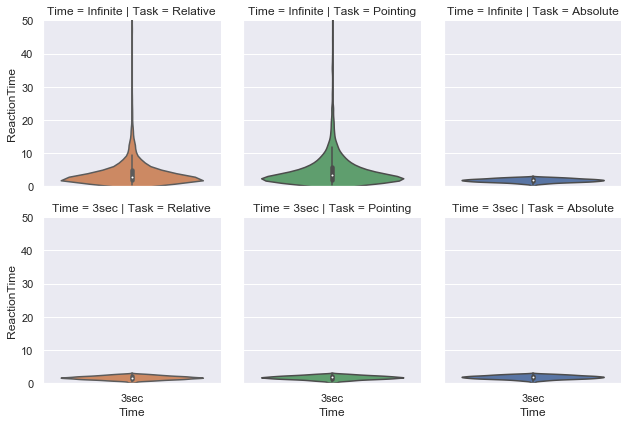

In [4]:
# group by Task and Time and then compute for each group the respective mean of Reaction Time
seaHaven['MeanReactionTime'] = list(range(len(seaHaven.index)))
seaHaven['MeanReactionTime'] = seaHaven.groupby([seaHaven['Task'],seaHaven['Time'], seaHaven['Subject']]).transform('mean')

# create #Task x #Time violinplots for Task and Time conditions
ordered_cols = seaHaven.Task.value_counts().index
ordered_rows = seaHaven.Time.value_counts().index
grid = sns.FacetGrid(data=seaHaven, col = 'Task', row = 'Time', hue = 'Task', col_order = ordered_cols, row_order = ordered_rows)
grid = grid.map(sns.violinplot, 'Time', 'ReactionTime')
grid.set(ylim=[0,50])


You may have noticed that there are (extreme) outliers, that have to be removed from the **preprocessed data**.

- For each task (Absolute, Relative, Pointing) and time condition (3sec, Infinite) look at the RTs and keep only the ones that are within +2 and -2 standard deviation:

$ |(RT_{group1} - mean(RT_{group1}))| \leq (2*std(RT_{group1})) $

$group1$ = e.g. data of absolute task for time condition 3sec

- Make again a violinplot for each combination of task and time condition (you should end up with 6 violinplots). Make sure that the data distributions are displayed clearly and that the y-axes are uniformly scaled to make your plots comparable. You may split up the single plots for a better overview.
- How does the distribution of the data look now? Is it still skewed?

727 outliers were removed.


C:\Users\simon\Miniconda3\envs\acc\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


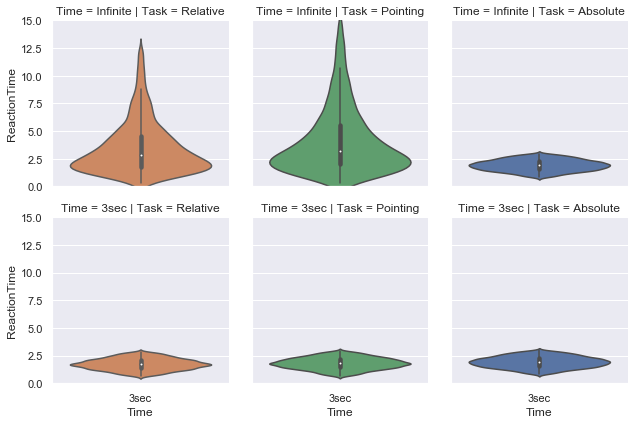

In [5]:
# compute mean and std grouping by Task and Time values
mean = seaHaven['ReactionTime'].groupby([seaHaven['Task'], seaHaven['Time']]).transform(np.nanmean)
std = seaHaven['ReactionTime'].groupby([seaHaven.Task, seaHaven.Time]).transform(np.nanstd)

# remove all outliers 
len_before = len(seaHaven)
seaHaven.loc[np.abs(seaHaven['ReactionTime'] - mean) > 2*std, 'ReactionTime'] = np.nan

# drop rows with NaN values
seaHaven = seaHaven.dropna()

print(len_before-len(seaHaven), "outliers were removed.")

# create #Task x #Time violinplots for Task and Time conditions
ordered_cols = seaHaven.Task.value_counts().index
ordered_rows = seaHaven.Time.value_counts().index
grid = sns.FacetGrid(data=seaHaven, col = 'Task', row = 'Time', hue = 'Task', col_order = ordered_cols, row_order = ordered_rows)
grid = grid.map(sns.violinplot, 'Time', 'ReactionTime')
grid.set(ylim=[0,15])


# save averaged dataframe
DATAPATH = os.getcwd() + '/seaHaven_test.csv'
seaHaven.to_csv(DATAPATH, index=False)

**Please make sure that you use the preprocessed data without outliers for the following assignments!**

## Assignment 2: Checking for possible hypotheses [5 pts]

### a) Hypothesis 1 [2 pt]

**Hypothesis 1:** "Given that subjects are limited by time, if they are faster in RT they are also less accurate."

- Use the data of the relative task.
- For each time condition (3sec / Infinite) calculate the mean RT and Accuracy per subject. Rename the column "Answer" to "Accuracy" (the accuracy corresponds to the averaged answer-values).
- Make a scatterplot of the mean RT (x-axis) and the accuracy (y-axis) for the time condition "3sec". 
- Make a second scatterplot and add a simple linear regression line to it. Calculate the slope of the regression line (you are allowed to use scipy). 
- Considering your results, what can you say about the hypothesis?

It looks like the linear regression is not a good model in this case. The slope is 0.05951578253388473


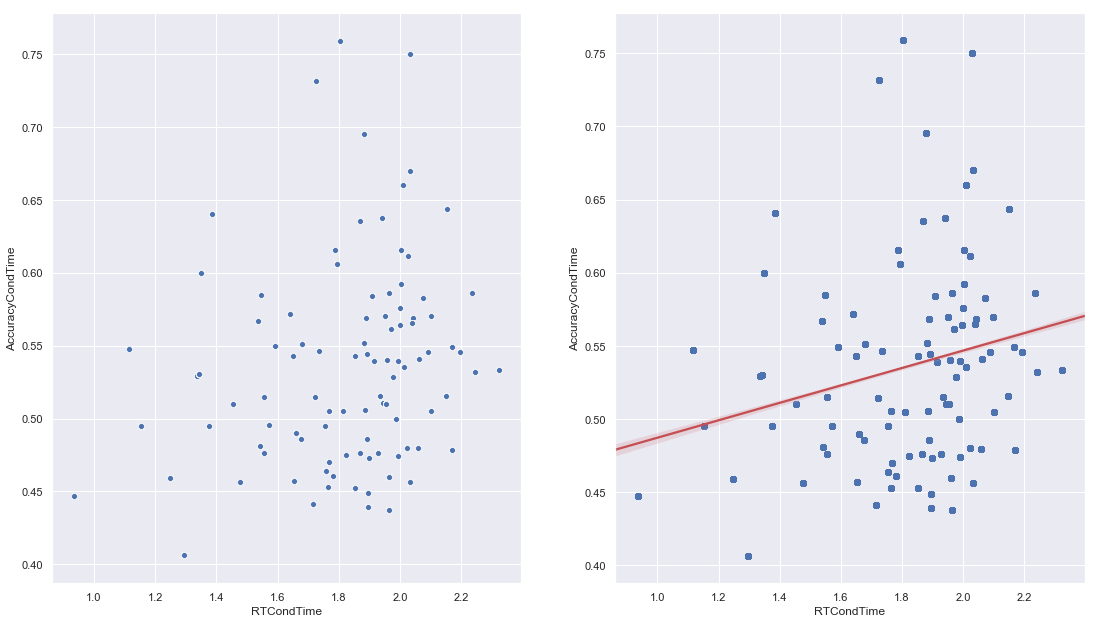

In [6]:
# set path of dataset
path = 'seaHaven_test.csv'

# use columns "ReactionTime", "AngularDiffBin", "Subject", "Task, "Time", "Answer" and "Measurement"
seaHaven = pd.read_csv(path)

# create column for mean RT and Accuracy per subject grouped by Time 
seaHaven['AccuracyCondTime'] = list(range(len(seaHaven.index)))
seaHaven['AccuracyCondTime'] = seaHaven.groupby([seaHaven['Subject'], seaHaven['Time']])['Answer'].transform('mean')
seaHaven['RTCondTime'] = list(range(len(seaHaven.index)))
seaHaven['RTCondTime'] = seaHaven.groupby([seaHaven['Subject'], seaHaven['Time']])['ReactionTime'].transform('mean')

df3sec = seaHaven[seaHaven['Time'] == '3sec']

fig, axes = plt.subplots(ncols=2)
# first plot with just scatter
sns.scatterplot(x="RTCondTime", y="AccuracyCondTime", data=df3sec, ax=axes[0])
# second plot with additional linear regression line
sns.regplot(x="RTCondTime", y="AccuracyCondTime", data=df3sec, line_kws={'color': 'r'}, ax=axes[1])
fig.set_size_inches(18.5, 10.5)
slope, intercept, r_value, p_value, std_err = stats.linregress(df3sec['RTCondTime'],df3sec['AccuracyCondTime'])
print("It looks like the linear regression is not a good model in this case. The slope is", slope)


### b) Hypothesis 2 [1 pt]

**Hypothesis 2:** "Given that subjects have infinite time, they perform better."

- Use the data of all three tasks.
- For each task (Absolute, Relative, Pointing) and time condition (3sec, Infinite) calculate the accuracy per subject. Rename the column "Answer" to "Accuracy" (the accuracy corresponds to the averaged answer-values).
- Make a pointplot of the tasks (x-axis) and the accuracy (y-axis) for both time conditions (3sec / Infinite). The y-axis should start at 0.0 and end at 1.0.
- For better comparison print both conditions in one plot and add a line at accuracy=0.5 to check if the results are above chance.
- Hint: Play with the keyword dodge.
- Considering your plots, what can you say about the hypothesis?

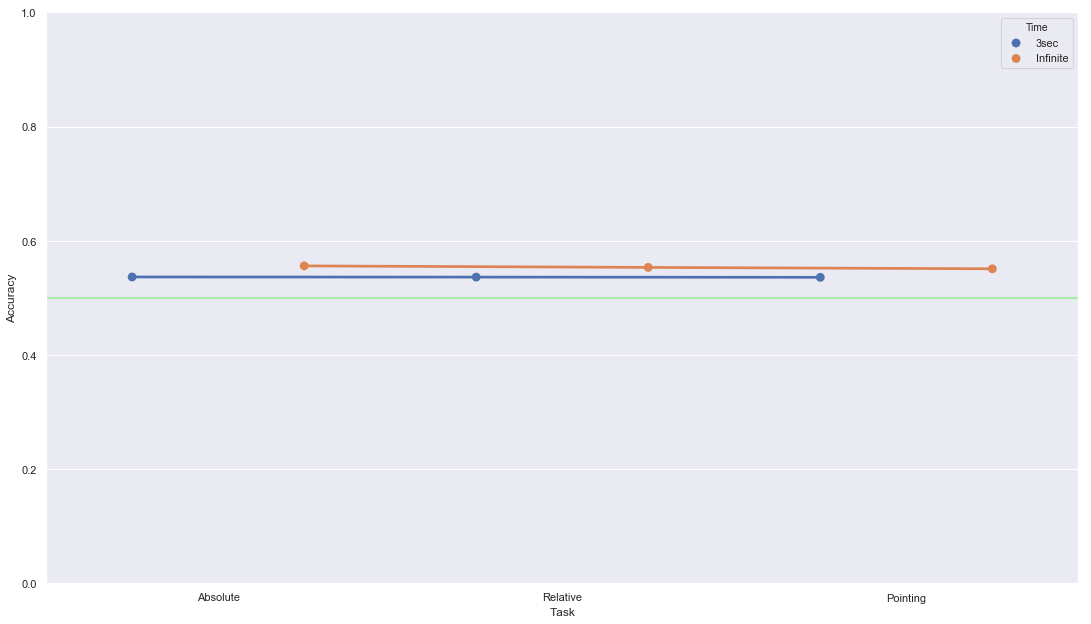

In [7]:
fig, ax = plt.subplots(ncols=1)

# create column for mean RT and Accuracy per subject grouped by Time 
seaHaven['Accuracy'] = list(range(len(seaHaven.index)))
seaHaven['Accuracy'] = seaHaven.groupby([seaHaven['Subject'], seaHaven['Time']])['Answer'].transform('mean')

# point plot of the different time conditions 
ax = sns.pointplot(x="Task", y="Accuracy", hue='Time', data=seaHaven, dodge=0.5)
# limits for y-axis-values
ax.set(ylim=(0, 1))
# line at accuracy=0.5 for chance level
ax.axhline(0.5, color='lightgreen')

# set plot size
fig.set_size_inches(18.5, 10.5)

### d) Hypothesis 3 [1 pt]

**Hypothesis 3:** "With each subsequent session subjects get better in performance."

- Use the data of the relative task.
- For each time condition (3sec / Infinite) calculate the mean RT and Accuracy per subject. Rename the column "Answer" to "Accuracy" (the accuracy corresponds to the averaged answer-values).
- Make a pointplot of the measurement (x-axis) and the accuracy (y-axis) for both time conditions (3sec / Infinite). The y-axis should start at 0.0 and end at 1.0.
- For better comparison print both conditions in one plot and add a line at accuracy=0.5 to check if the results are above chance.
- Hint: Play with the keyword dodge.
- Make also a pointplot of the measurement (x-axis) and RT (y-axis) for both time conditions (3sec / Infinite).  Make sure that the data is displayed clearly. You may split up the single plots for a better overview.
- Considering your plots, what can you say about the hypothesis?

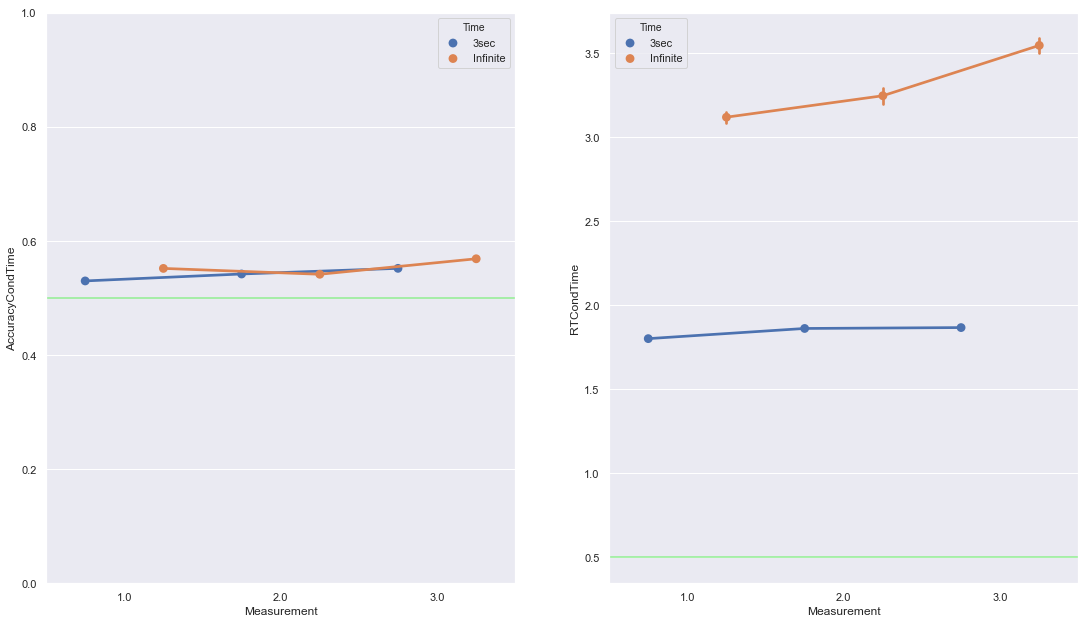

0        1.295
1        1.295
2        1.295
3        1.295
4        1.295
5        1.295
6        1.295
7        1.295
8        1.295
9        1.295
10       1.295
11       1.295
12       1.295
13       1.295
14       1.295
         ...  
19341    4.512
19342    4.512
19343    4.512
19344    4.512
19345    4.512
19346    4.512
19347    4.512
19348    4.512
19349    4.512
19350    4.512
19351    4.512
19352    4.512
19353    4.512
19354    4.512
19355    4.512
Name: RTCondTime, Length: 19356, dtype: float64


In [8]:
fig, axes = plt.subplots(ncols=2)

# plot Measurements with Accuracy per Subject grouped by Time
sns.pointplot(x="Measurement", y="AccuracyCondTime", hue='Time', data=seaHaven, dodge=0.5, ax=axes[0])
# plot Measurement with the ReactionTime per Subject grouped by Time
sns.pointplot(x="Measurement", y="RTCondTime", hue='Time', data=seaHaven, dodge=0.5, ax=axes[1])

# line at accuracy=0.5 for chance level
axes[0].axhline(0.5, color = 'lightgreen')
# limits for y-axis-values
axes[0].set(ylim=(0, 1))

# line at accuracy=0.5 for chance level
axes[1].axhline(0.5, color = 'lightgreen')
# limits for y-axis-values
#axes[1].set(ylim=(0, 1))

# set plot size
fig.set_size_inches(18.5, 10.5)

plt.show()

print(seaHaven['RTCondTime'])

### c) Hypothesis 4 [1 pts]

**Hypothesis 4:** "When the angular difference between houses increases subjects are more accurate in the relative task."

- Use the data of the relative task.
- For each angular difference (see "AngularDiffBin") calculate the accuracy per subject. Rename the column "Answer" to "Accuracy" (the accuracy corresponds to the averaged answer-values).
- Make a pointplot of the angular differences (x-axis) and the accuracy (y-axis) for both time conditions (3sec / Infinite). The y-axis should start at 0.0 and end at 1.0.
- For better comparison print both conditions in one plot and add a line at accuracy=0.5 to check if the results are above chance. Make sure that the angular differences are displayed in ascending order.
- Hint: Play with the keyword dodge.
- Considering your plots, what can you say about the hypothesis?

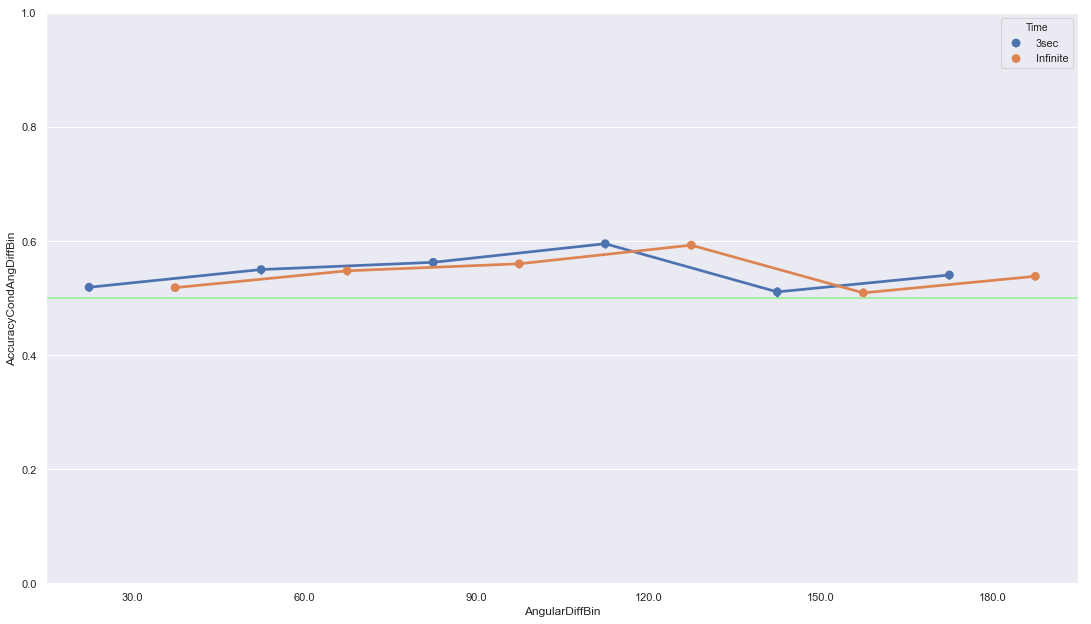

In [9]:
# create an extra column in order to compute the accuracy per subject grouped by angular difference 
seaHaven['AccuracyCondAngDiffBin'] = list(range(len(seaHaven.index)))
seaHaven['AccuracyCondAngDiffBin'] = seaHaven.groupby([seaHaven['Subject'], seaHaven['AngularDiffBin']])['Answer'].transform('mean')

#print(seaHaven)
fig, ax = plt.subplots(ncols=1)

# plot AngularDiffBin against respective group Accuracy
sns.pointplot(x="AngularDiffBin", y="AccuracyCondAngDiffBin", hue='Time', data=seaHaven, dodge=0.5)

# line at accuracy=0.5 for chance level
ax.axhline(0.5, color = 'lightgreen')
# limits for y-axis-values
ax.set(ylim=(0, 1))

# set plot size
fig.set_size_inches(18.5, 10.5)


## Assignment 3: T-test [2 pts]

We will perform a two-sample t-test, i.e. we compare the mean of two groups under the assumption that both are independent and normally distributed with unknown but equal variances. In this case we will look at the data of the relative task and compare the accuracies of the two time conditions (3sec / Infinte). We will ignore that there are different measurement days!

- Use the data of the relative task.
- For each time condition (3sec / Infinite) calculate the accuracy per subject. Rename the column "Answer" to "Accuracy" (the accuracy corresponds to the averaged answer-values).
- Check if the data is normally distributed using scipy.stats.normaltest.


- Compute the t-statistics: $ t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $

$\bar{x}_1$: mean accuracy of all subjects for time condition "3sec" <br>
$\bar{x}_2$: mean accuracy of all subjects for time condition "Infinite" <br>
$n_1$: sample size for time condition "3sec" <br>
$n_2$: sample size for time condition "Infinite"


- with $ s^2 = \frac{\sum_{i=1}^n{(x_i - \bar{x})^2}}{n-1} $

$x_i$: accuracy of subject i <br>
$\bar{x}$: mean accuracy of all subjects <br>
$n$: sample size


- Calculate the degrees of freedom: $ df = n_1 + n_2 -2 $
- What does the p-value of a t-test tell you in general? Also explain what your calculated p-value tells you specifically (given $\alpha = 0.05$)?

In [10]:
# mean Accuracy for 3 Seconds condition of Time over all Subjects
x_1 = seaHaven.loc[seaHaven['Time'] == '3sec','Answer'].mean()
# mean Accuracy for Infinite condition of Time over all Subjects
x_2 = seaHaven.loc[seaHaven['Time'] == 'Infinite','Answer'].mean()

# Sample Size for the 3 Seconds condition of Time
n_1 = len(seaHaven[seaHaven['Time'] == '3sec'])
# Sample Size for the Infite condition of Time
n_2 = len(seaHaven[seaHaven['Time'] == 'Infinite'])

# Calculate the mean Accuracy for each Subject for Time condition 3 Sec  
x_i = seaHaven.loc[seaHaven['Time'] == '3sec','AccuracyCondTime']

# Calculate the mean Accuracy for each Subject for Time condition Inf  
x_j = seaHaven.loc[seaHaven['Time'] == 'Infinite','AccuracyCondTime']

s_1 = np.sum(x_i - x_1)/(n_1-1)
s_2 = np.sum(x_j - x_2)/(n_2-2)

t = (x_1 - x_2) / np.sqrt((s_1)**2/n_1 + (s_2)**2/n_2)    

# Calculate the degrees of freedom
df = n_1 + n_2 - 2

# gives you the p-value after comparing the t-statistic with the critical t value (computed internally) 
p = 1 - stats.t.cdf(t,df=df)

print("t = " + str(t))
print("p = " + str(2*p))

# test if your calculation is correct
t2, p2 = stats.ttest_ind(x_1,x_2)
print("t = " + str(t2))
print("p = " + str(p2))


alpha = 1e-3
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


t = -2.462160586524326e+16
p = 2.0
t = nan
p = nan
The null hypothesis cannot be rejected


C:\Users\simon\Miniconda3\envs\acc\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\simon\Miniconda3\envs\acc\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\simon\Miniconda3\envs\acc\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\simon\Miniconda3\envs\acc\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\simon\Miniconda3\envs\acc\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
